<a href="https://colab.research.google.com/github/mickey2798/Face-Matching/blob/main/GameChange_Asssigment_Facenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Detailed Explanation of my Code.***


> The very first thing which I have done is, finding and extracting faces from photos  using MTCNN(Multi-task Cascaded Convolutional Network) `extract_face`, then I got the bounding box coordinates, and using the coordinates I cropped the image, such that at the end I will have only the numpy array of the FACE(Region of Interest).

> After extracting the face from the photos, I used `get_embedding` for  transfer learning through FaceNet model for face-verification.
  1. This involves calculating a face embedding for a new given face and comparing the embedding to the embedding for the single example of the face known to the system.
  2. We can use Euclidean distance or Cosine Distance to measure the distance between the face embeddings and the faces are said to be matched(`is_match`) if the distance is within a specific threshold limit(in my case it's 0.55).

In [ ]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 42kB/s 
     |████████████████████████████████| 3.8MB 56.3MB/s 
     |████████████████████████████████| 512kB 37.1MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=261ea60787f2157982ab47e6244ca94f9e191ce90735d3d0db9fd786ab774fd8
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tens

In [ ]:
! pip install keras==2.2.4

     |████████████████████████████████| 317kB 8.9MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [ ]:
import keras
print(keras.__version__)

2.2.4


Using TensorFlow backend.


In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 6.1MB/s 


In [ ]:
! pip install keras-facenet

In [ ]:
## Importing necessary libraries.
from PIL import Image as Img
from numpy import asarray, expand_dims
from mtcnn.mtcnn import MTCNN
from scipy.spatial.distance import cosine 
import matplotlib.pyplot as plt

In [ ]:
#Extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
  pixels = plt.imread(filename)            #reading the image
  detector = MTCNN()                       #faceDetector 
  results = detector.detect_faces(pixels)  #detecting the faces from the image        
  x1, y1, width, height = results[0]['box']#getting the bounding box 
  x2, y2 = x1+width, y1+height
  face = pixels[y1:y2, x1:x2]              #extracting the face
  image = Img.fromarray(face)
  image = image.resize(required_size)      #resizing the face         
  face_array = asarray(image)
  return face_array

In [ ]:
#Extract faces and calculate face embeddings
from keras_facenet import FaceNet
def get_embeddings(filename):
  faces = [extract_face(f) for f in filename]   #extract faces from the images, using the previous function
  samples = asarray(faces, 'float32')           #Convert into an array of samples
  embedder = FaceNet()
  embeddings = embedder.embeddings(samples)
  return embeddings




In [ ]:
#Determine if a candidate face is a match or not
def is_match(known_embedding, candidate_embedding, thresh=0.4):
  score = cosine(known_embedding, candidate_embedding)    #calculate the distance between the embeddings
  if score <= thresh:
    print("Face is a MATCH!(%.3f <= %.3f)" %(score, thresh))
  else:
    print("Face is NOT a MATCH!(%.3f > %.3f)" %(score, thresh))

In [ ]:
#Getting the images - ELON MUSK
!wget https://i.pinimg.com/474x/bf/01/37/bf0137f9d96fa428c67bd120af53683d.jpg
!wget https://www.biography.com/.image/t_share/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg

--2020-09-09 18:57:55--  https://i.pinimg.com/474x/bf/01/37/bf0137f9d96fa428c67bd120af53683d.jpg
Resolving i.pinimg.com (i.pinimg.com)... 88.221.165.28, 2a04:4e42:9::84
Connecting to i.pinimg.com (i.pinimg.com)|88.221.165.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8754 (8.5K) [image/jpeg]
Saving to: ‘bf0137f9d96fa428c67bd120af53683d.jpg’

bf0137f9d96fa428c67 100%[===================>]   8.55K  --.-KB/s    in 0s      

2020-09-09 18:57:55 (188 MB/s) - ‘bf0137f9d96fa428c67bd120af53683d.jpg’ saved [8754/8754]

--2020-09-09 18:57:55--  https://www.biography.com/.image/t_share/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg
Resolving www.biography.com (www.biography.com)... 151.101.2.98, 151.101.66.98, 151.101.130.98, ...
Connecting to www.biography.com (www.biography.com)|151.101.2.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151791 (148K) [image/jpeg]
Saving to: ‘elon_musk_royal_society.jpg’

elon_musk_royal_soc 100%[=

In [ ]:
# Images - HritikRoshan
! wget https://83810-371851-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2012/05/hrithik.jpg
! wget https://www.kanaphusi.com/wp-content/uploads/2020/04/hrithikroshanpicture31587975658.jpg

--2020-09-09 18:57:58--  https://83810-371851-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2012/05/hrithik.jpg
Resolving 83810-371851-raikfcquaxqncofqfm.stackpathdns.com (83810-371851-raikfcquaxqncofqfm.stackpathdns.com)... 151.139.242.8
Connecting to 83810-371851-raikfcquaxqncofqfm.stackpathdns.com (83810-371851-raikfcquaxqncofqfm.stackpathdns.com)|151.139.242.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5463 (5.3K) [image/jpeg]
Saving to: ‘hrithik.jpg’

hrithik.jpg         100%[===================>]   5.33K  --.-KB/s    in 0s      

2020-09-09 18:57:59 (661 MB/s) - ‘hrithik.jpg’ saved [5463/5463]

--2020-09-09 18:57:59--  https://www.kanaphusi.com/wp-content/uploads/2020/04/hrithikroshanpicture31587975658.jpg
Resolving www.kanaphusi.com (www.kanaphusi.com)... 166.62.27.131
Connecting to www.kanaphusi.com (www.kanaphusi.com)|166.62.27.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22898 (22K) [image/jpeg]
Saving t

In [ ]:
#Bill Gates
! wget https://content.thriveglobal.com/wp-content/uploads/2019/03/shutterstock_247513390.jpg
! wget https://i.ytimg.com/vi/6V6Gir1Dyfs/maxresdefault.jpg

--2020-09-09 19:13:50--  https://content.thriveglobal.com/wp-content/uploads/2019/03/shutterstock_247513390.jpg
Resolving content.thriveglobal.com (content.thriveglobal.com)... 104.22.31.175, 104.22.30.175, 172.67.5.226, ...
Connecting to content.thriveglobal.com (content.thriveglobal.com)|104.22.31.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 782624 (764K) [image/jpeg]
Saving to: ‘shutterstock_247513390.jpg.1’

shutterstock_247513 100%[===================>] 764.28K  --.-KB/s    in 0.02s   

2020-09-09 19:13:50 (36.7 MB/s) - ‘shutterstock_247513390.jpg.1’ saved [782624/782624]

--2020-09-09 19:13:50--  https://i.ytimg.com/vi/6V6Gir1Dyfs/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 108.177.127.119, 2a00:1450:4013:c01::77
Connecting to i.ytimg.com (i.ytimg.com)|108.177.127.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58778 (57K) [image/jpeg]
Saving to: ‘maxresdefault.jpg’

maxresdefault.jpg   100%[=============

In [ ]:
#Creating a list of images that are in my drive.
import os
prefix_path = '/content/'
prefix = os.path.abspath(prefix_path) 
file_list = [f for f in os.listdir(prefix) if f.endswith('.jpg')]

In [ ]:
file_list

['hrithik.jpg',
 'elon_musk_royal_society.jpg',
 'shutterstock_247513390.jpg',
 'bf0137f9d96fa428c67bd120af53683d.jpg',
 'hrithikroshanpicture31587975658.jpg',
 'maxresdefault.jpg']

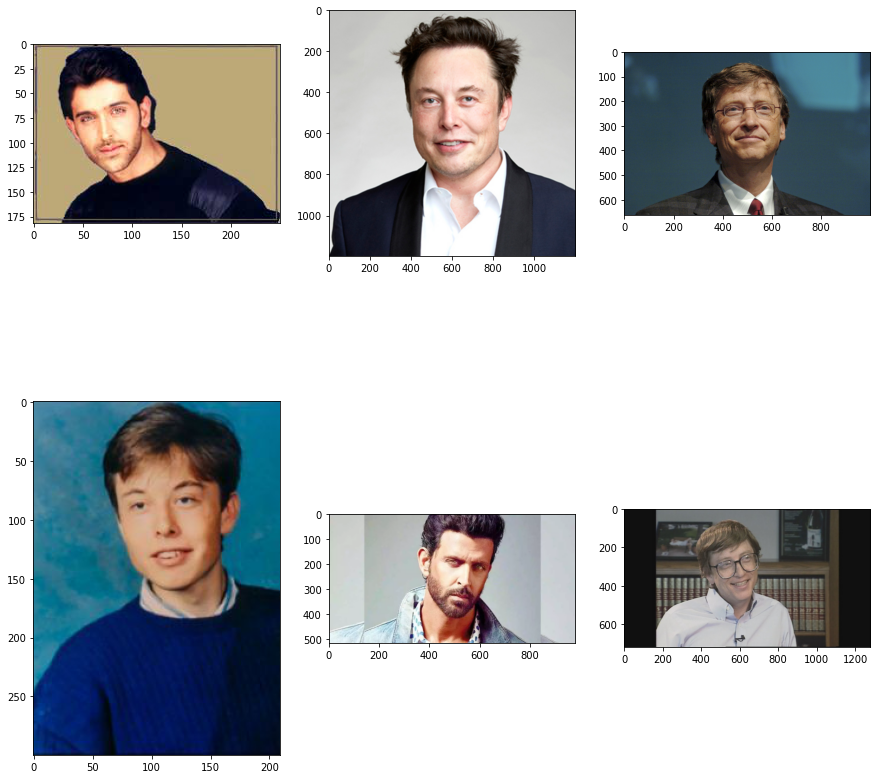

In [ ]:
#Visualizing the images.
import matplotlib.image as mpimg
plt.figure(figsize=(15, 15)) # specifying the overall grid size

for i in range(len(file_list)):
    plt.subplot(2, 3,i+1)    #Specifying row and column.
    image = mpimg.imread(file_list[i])
    plt.imshow(image)

plt.show()

In [ ]:
# get embeddings of the image list.
embeddings = get_embeddings(file_list)

In [ ]:
print("MATCHING==>")
is_match(embeddings[0], embeddings[4])
is_match(embeddings[1], embeddings[3])
is_match(embeddings[2], embeddings[5])



print("NOT MATCHING==>")
is_match(embeddings[0], embeddings[3])
is_match(embeddings[1], embeddings[5])
is_match(embeddings[2], embeddings[4])



MATCHING==>
Face is a MATCH!(0.384 <= 0.400)
Face is a MATCH!(0.257 <= 0.400)
Face is a MATCH!(0.259 <= 0.400)
NOT MATCHING==>
Face is NOT a MATCH!(1.078 > 0.400)
Face is NOT a MATCH!(0.672 > 0.400)
Face is NOT a MATCH!(0.990 > 0.400)
